# Изследване на данните, с цел да се подготвят за създаване на модел ,който да предсказва цената на дадено вино.

## Множеството от данни съдържа следната информация:
    Points: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
    Variety: the type of grapes used to make the wine (ie Pinot Noir)
    Description: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
    Country: the country that the wine is from
    Province: the province or state that the wine is from
    Region 1: the wine growing area in a province or state (ie Napa)
    Region 2: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
    Winery: the winery that made the wine
    Designation: the vineyard within the winery where the grapes that made the wine are from
    Price: the cost for a bottle of the wine


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [108]:
wine_data = pd.read_csv('file:///D:/Machine Learning/Kaggle/Wine/winemag-data_first150k.csv')

In [109]:
wine_data.shape

(150930, 11)

In [110]:
wine_data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Проверка за липсващи стойности

In [111]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [112]:
wine_data.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

Понеже атрибута price е целивият атрибут то ще премахне обектите които имат стойност null за него.
Понеже атрибута province има само 5 обекта с липсващи стойности за него, ще ги премахнем.

In [113]:
wine_data.dropna(axis=0, subset=['price'], inplace=True)
wine_data.dropna(axis=0, subset=['province'], inplace=True)

Ще попълним липсващите стойности на designation, region_1, region_2 с празен стринг. 

In [114]:
wine_data.designation.fillna('', inplace=True)
wine_data.region_1.fillna('', inplace=True)
wine_data.region_2.fillna('', inplace=True)

In [115]:
wine_data.isnull().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

In [116]:
wine_data.describe(include='all')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,137230.000000,137230,137230,137230,137230.000000,137230.000000,137230,137230,137230,137230,137230
unique,NaN,46,89105,28344,NaN,NaN,446,1198,19,619,13851
top,NaN,US,"Powerful in Zinny character, this blend of Dry...",,NaN,NaN,California,,,Chardonnay,Williams Selyem
freq,NaN,62139,6,42311,NaN,NaN,44356,22837,76526,13775,371
mean,75729.662938,NaN,NaN,NaN,87.788035,33.132019,NaN,NaN,NaN,NaN,NaN
std,43867.600733,NaN,NaN,NaN,3.221572,36.323072,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,37587.500000,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,75725.500000,NaN,NaN,NaN,88.000000,24.000000,NaN,NaN,NaN,NaN,NaN
75%,114108.750000,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


## Изводи от информацията в таблиците

Атрибута Unnamed изгежда че е уникален идентификатор, който изглежда че не носи информация, която би могла да бъде полезна при изгражаденото на моделът, така че този атрибут ще бъде изтрит.

In [117]:
wine_data.drop(wine_data.columns[0], axis=1, inplace=True)

Атрибута description има 97821 уникални стойности от 150930 общо, което е странно за такъв тип атрибут, нека проверим дали става въпрос са дублирани обекти като цяло или просто има различни вина с един и същ description

In [118]:
duplicated = wine_data[wine_data.duplicated(wine_data.columns)]
duplicated.shape

(48102, 10)

Хммм, все пак има дуплиращи се обекти, нека да ги разкараме.

In [119]:
wine_data.drop_duplicates(inplace=True)

Следващият атрибут който прави впечатление е points, виждаме че стойностите му са между 80 и 100.
Какво точно представлява той? Дали едно вино със 100 точки е с около 20 процента по-добро от вино с 80 точки?
След справка с google, се указва че най-вероятно става въпрос за рейтинговата система създадена от Robert M. Parker, Jr,
При която винате се оценяват с рейтинг от 50 до 100, като за добро вино се счита такова с оценка над 85, за изключително
такова с рейтинг над 90, и за вино с оценка от над 95 за класическо, тази информация може да помогне
при създаването на нови атрибути. Нека видим как оценката се отразява на цената.

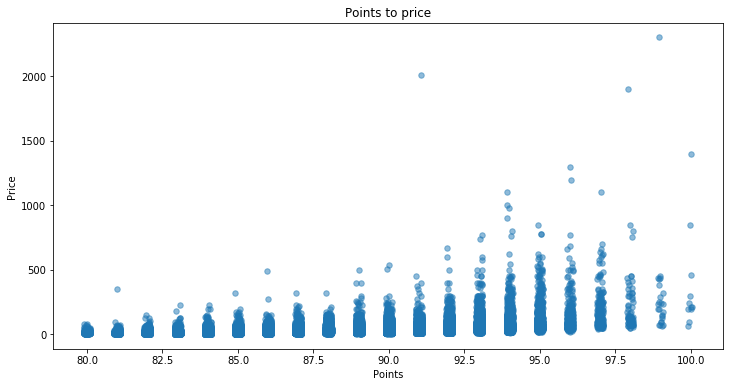

In [120]:
import random
points = wine_data.points.iloc[:]
points = points.apply(lambda x: x + random.uniform(-0.1, 0.1))
plt.subplots(figsize=(12,6))
plt.scatter(x=points, y=wine_data.price, s=30, cmap='RdYlGn_r', alpha=0.5)
plt.title('Points to price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

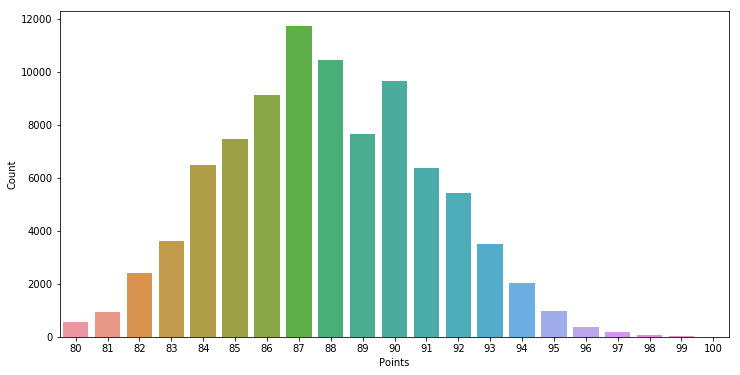

In [121]:
plt.subplots(figsize=(12,6))
sns.countplot(wine_data.points)
plt.xlabel('Points')
plt.ylabel('Count')
plt.show()

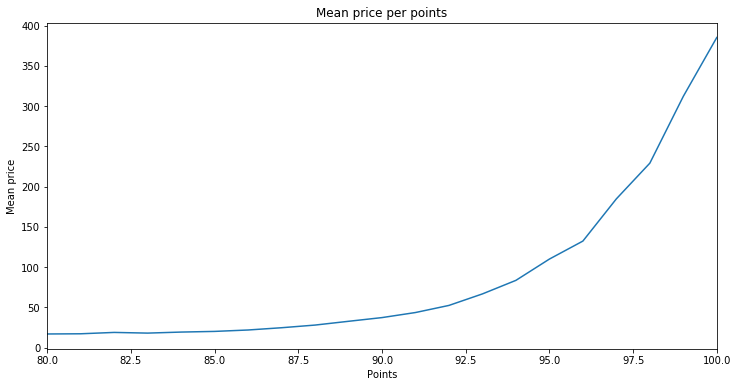

In [122]:
plt.subplots(figsize=(12,6))
price_to_points_mean = wine_data.groupby('points').price.mean().plot()
plt.title('Mean price per points')
plt.xlabel('Points')
plt.ylabel('Mean price')
plt.show()

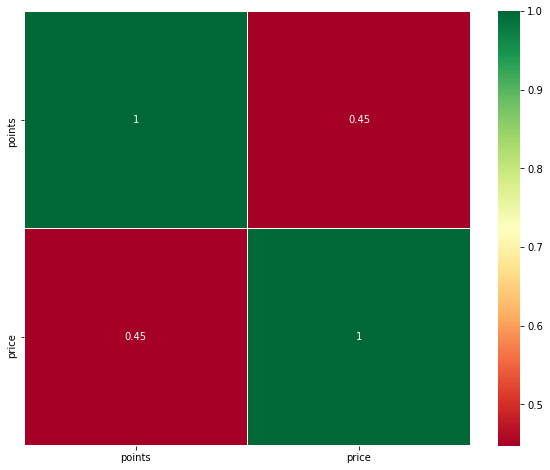

In [123]:
sns.heatmap(wine_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

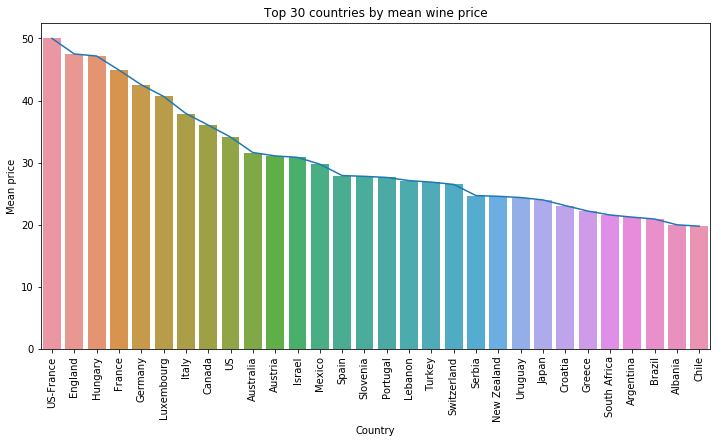

In [167]:
plt.subplots(figsize=(12,6))
countries_mean = wine_data.groupby('country').price.mean().nlargest(30)
p = countries_mean.plot()
countries = countries_mean.index
c_means = countries_mean.values
sns.barplot(countries, c_means)
plt.title("Top 30 countries by mean wine price")
plt.xlabel('Country')
plt.ylabel('Mean price')
plt.xticks(rotation=90)
plt.show()

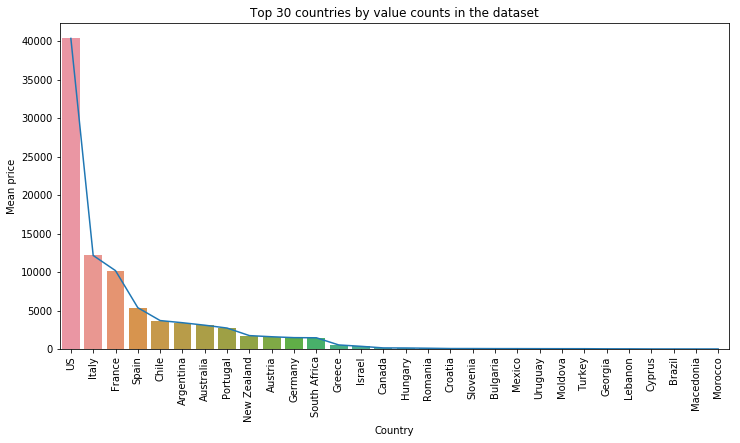

In [189]:
plt.subplots(figsize=(12,6))
countries_mean = wine_data.groupby('country').price.count().nlargest(30)
p = countries_mean.plot()
countries = countries_mean.index
c_means = countries_mean.values
sns.barplot(countries, c_means)
plt.title("Top 30 countries by value counts in the dataset")
plt.xlabel('Country')
plt.ylabel('Mean price')
plt.xticks(rotation=90)
plt.show()

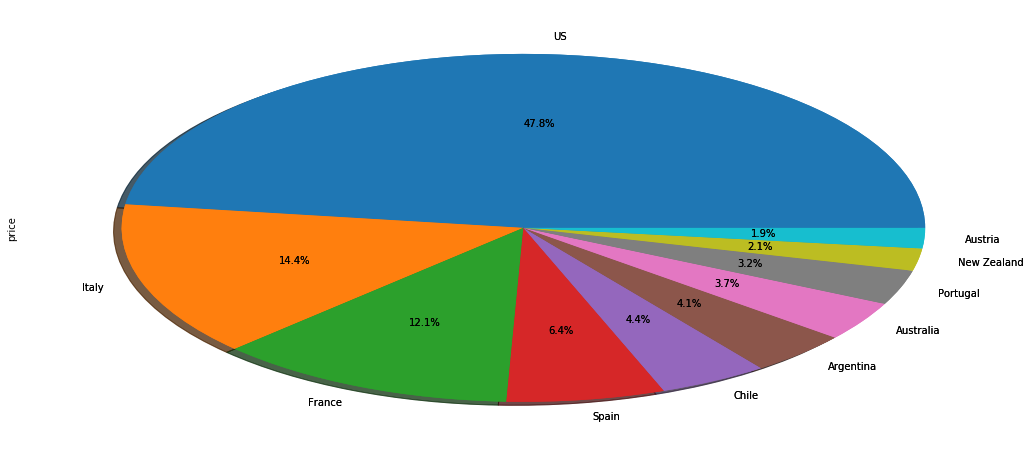

In [191]:
wine_data.groupby('country').price.count().nlargest(10).plot.pie(   autopct='%1.1f%%',shadow=True, figsize=(18,8))
plt.show()

Ако приемем че броя на различните видове вина произведени от всяка страна е сравнително пропорционална на количеството вино произведено от всяка страна, и погледнем графиката доло за дял на произвоизводство на вино на всяка страна спрямо глобалното производство на вино, можем да заключим че дадената ни извадка не е представителна.

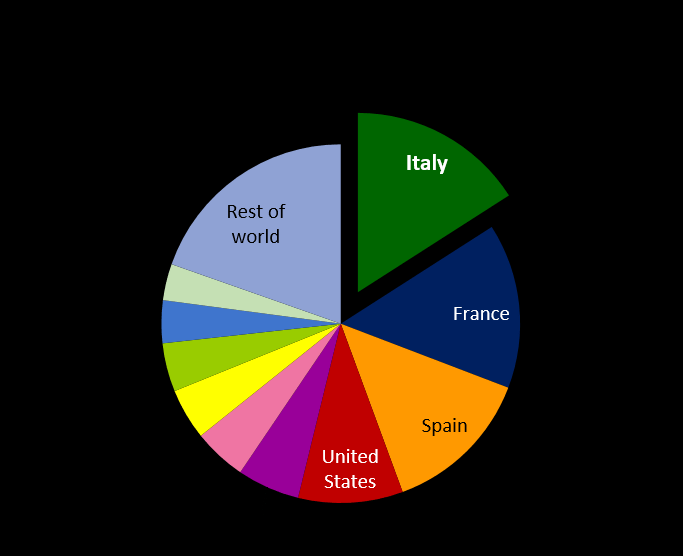


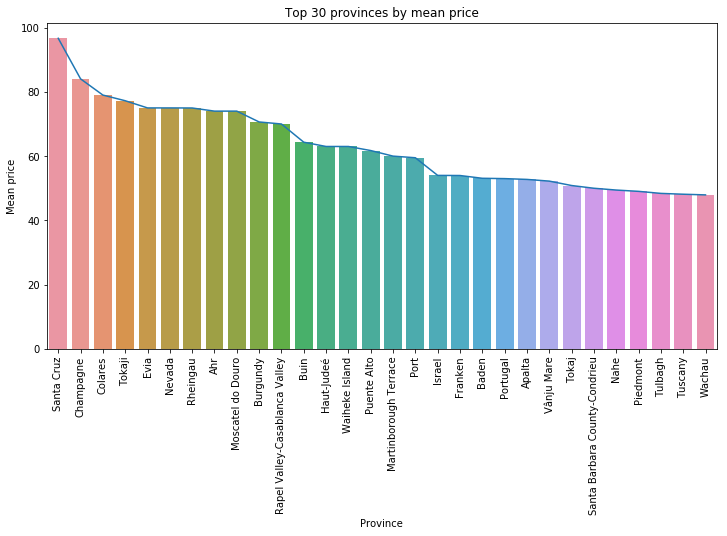

In [169]:
plt.subplots(figsize=(12,6))
provinces_means = wine_data.groupby('province').price.mean().nlargest(30)
p = provinces_means.plot()
provinces = provinces_means.index
p_means = provinces_means.values
sns.barplot(provinces, p_means)
plt.title("Top 30 provinces by mean price")
plt.xlabel('Province')
plt.ylabel('Mean price')
plt.xticks(rotation=90)
plt.show()

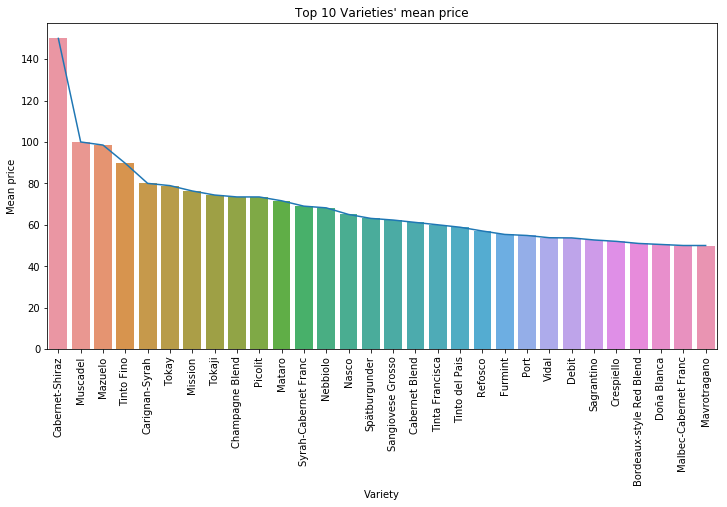

In [170]:
plt.subplots(figsize=(12,6))
varaties_means = wine_data.groupby('variety').price.mean().nlargest(30)
p = varaties_means.plot()
varieties = varaties_means.index
v_means = varaties_means.values
sns.barplot(varieties, v_means)
plt.title("Top 30 varieties by mean price")
plt.xlabel('Variety')
plt.ylabel('Mean price')
plt.xticks(rotation=90)
plt.show()

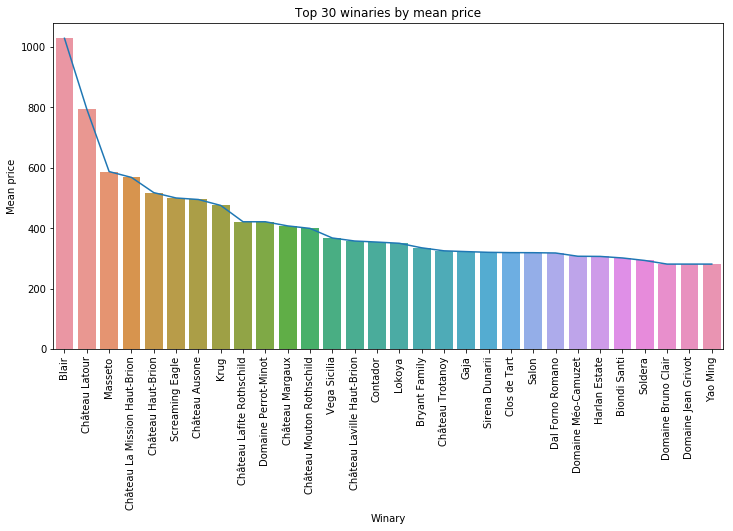

In [174]:
plt.subplots(figsize=(12,6))
wineries_means = wine_data.groupby('winery').price.mean().nlargest(30)
p = wineries_means.plot()
wineries = wineries_means.index
w_means = wineries_means.values
sns.barplot(wineries, w_means)
plt.title("Top 30 winaries by mean price")
plt.xlabel('Winary')
plt.ylabel('Mean price')
plt.xticks(rotation=90)
plt.show()

# Заключения:

1. Можем да заключим че даденото ни множество от данни не е представителна извадка. 
2. Между points и price има линейна зависимост в два интервала, [80,94] и (94,100], тази информация може да се използва при Featuring engineering.
3. Има голяма корелация между points и price.